In [1]:
import duckdb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


real_files = "read_parquet('results/processed/real/0/*.parquet')"
synth_files = "read_parquet('results/processed/synth/**/*.parquet')"


In [5]:
# Define the SQL query with a limit to retrieve only the first few rows
query_real = f"""
    SELECT 
        *
    FROM {real_files}
    LIMIT 5
"""

# Execute the query and convert the result to a DataFrame
result_real = duckdb.sql(query_real).df()

# Display the result
result_real


,id,wt_prediction,mut_prediction,pred_difference,vcf_id,mirna_accession,gene_id,is_intron,mutation_context,mutsig_key,is_gene_upregulated,experiment,mutsig,gene_name,biotype,cancer_type
0,PD10010a_10_100900726_G_A_MIMAT0000257,0.684779,0.269260,-0.416,PD10010a,MIMAT0000257,ENSG00000172987,True,C[C>T]G,PD10010a_C[C>T]G,True,0,SBS1,HPSE2,protein_coding,nnn
1,PD10010a_10_100900726_G_A_MIMAT0000441,0.628840,0.424571,-0.204,PD10010a,MIMAT0000441,ENSG00000172987,True,C[C>T]G,PD10010a_C[C>T]G,True,0,SBS1,HPSE2,protein_coding,nnn
2,PD10010a_10_100900726_G_A_MIMAT0001635,0.682595,0.397291,-0.285,PD10010a,MIMAT0001635,ENSG00000172987,True,C[C>T]G,PD10010a_C[C>T]G,True,0,SBS1,HPSE2,protein_coding,nnn
3,PD10010a_10_100900726_G_A_MIMAT0003264,0.831073,0.324415,-0.507,PD10010a,MIMAT0003264,ENSG00000172987,True,C[C>T]G,PD10010a_C[C>T]G,True,0,SBS1,HPSE2,protein_coding,nnn
4,PD10010a_10_100900726_G_A_MIMAT0003284,0.330688,0.552029,0.221,PD10010a,MIMAT0003284,ENSG00000172987,True,C[C>T]G,PD10010a_C[C>T]G,False,0,SBS1,HPSE2,protein_coding,nnn


In [2]:
import dask.dataframe as dd


real = dd.read_parquet("results/processed/real/0/*.parquet")
synth = dd.read_parquet("results/processed/synth/**/*.parquet")


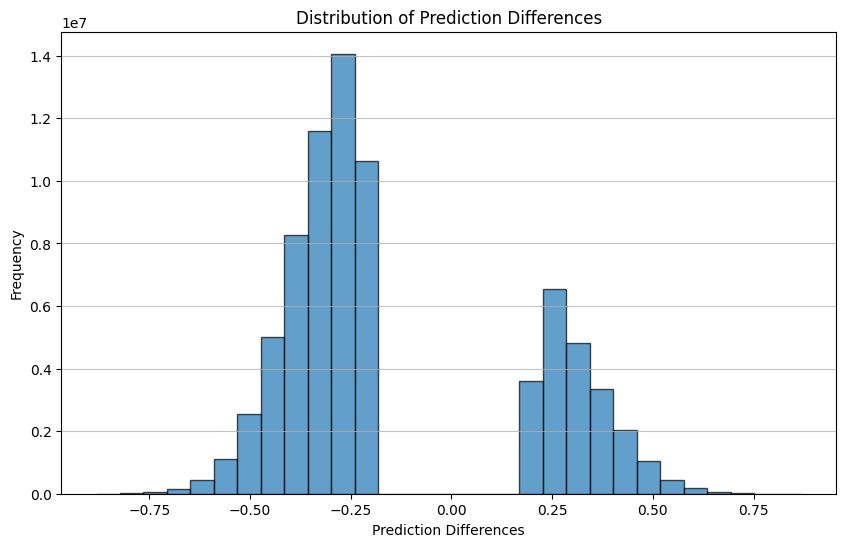

In [ ]:
preddiffs = real.pred_difference.compute()

# Plotting the distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(preddiffs, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Prediction Differences')
plt.xlabel('Prediction Differences')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

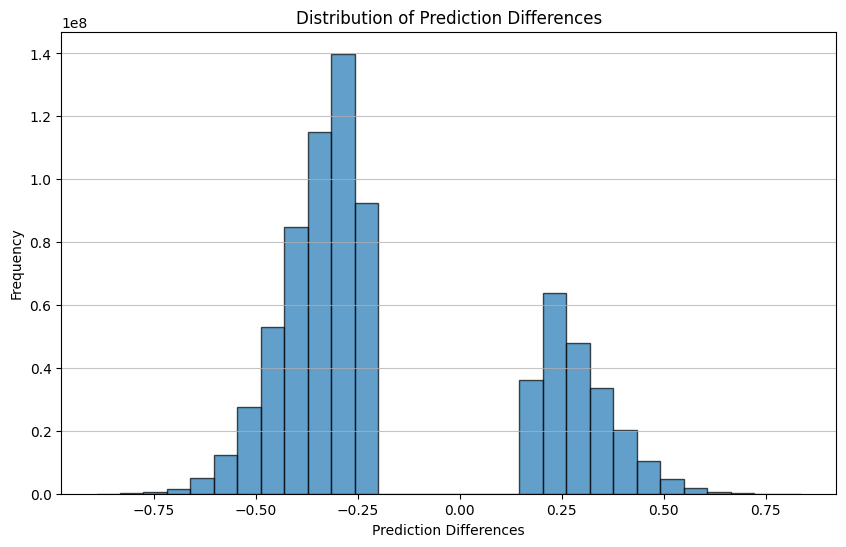

In [5]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Assuming you have a Dask DataFrame `synth`
preddiffs_s = synth.pred_difference  # This remains a Dask Series

# Define the number of bins
bins = 30

# Function to compute histogram for each partition
def compute_histogram(data, bins):
    hist, bin_edges = np.histogram(data, bins=bins)
    return hist, bin_edges

# Compute histograms for each partition and combine results
histograms = preddiffs_s.map_partitions(compute_histogram, bins=bins).compute()

# Combine the histograms from all partitions
total_hist = np.zeros(bins)
for hist, _ in histograms:
    total_hist += hist

# Get the bin edges from the first partition (all should have the same edges)
_, bin_edges = histograms[0]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], total_hist, width=np.diff(bin_edges), edgecolor='k', alpha=0.7)
plt.title('Distribution of Prediction Differences')
plt.xlabel('Prediction Differences')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
